# Introdução a Processamento de Texto

Este notebook mostra exemplos simples de processamento de texto em português. Os exemplos são baseados na biblioteca [NLTK - Natural Language Toolkit](https://www.nltk.org/). O projeto NLTK disponibiliza um livro sobre a biblioteca: [Natural Language Processing with Python](http://nltk.org/book).

Os exemplos usam um dataset de reclamações registradas por cidadãos. O detaset foi derivado de dados do [Portal de Dados Abertos da Prefeitura de Curitiba](https://www.curitiba.pr.gov.br/DADOSABERTOS/).

## Leitura e análise inicial dos dados


In [1]:
#importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# lê o arquivo CSV
df = pd.read_csv('../data/2017-02-01_156_-_Base_de_Dados_sample.csv', sep=';', encoding='latin-1')

Visualize algumas linhas de dados:

In [2]:
df.head(3)

SOLICITACAO         TIPO                               ORGAO        DATA  \
0      6669771  SOLICITAÇÃO  INSTITUTO DAS CIDADES INTELIGENTES  09/11/2016   
1      6718351  SOLICITAÇÃO  INSTITUTO DAS CIDADES INTELIGENTES  27/12/2016   
2      6702371  SOLICITAÇÃO  INSTITUTO DAS CIDADES INTELIGENTES  07/12/2016   

    HORARIO                            ASSUNTO  \
0  21:02:44   ABORDAGEM SOCIAL DE RUA - ADULTO   
1  00:40:04   ABORDAGEM SOCIAL DE RUA - ADULTO   
2  14:09:42  ABORDAGEM SOCIAL DE RUA - CRIANÇA   

                             SUBDIVISAO  \
0  PESSOAS/FAMÍLIAS EM DESABRIGO NA RUA   
1                  PERDIDA/DESORIENTADA   
2                 ALCOOLIZADAS/DROGADAS   

                                           DESCRICAO           LOGRADOURO_ASS  \
0  ABORDAGEM SOCIAL DE RUA - ADULTO - PESSOAS/FAM...       ANDRE DE BARROS, 0   
1  ABORDAGEM SOCIAL DE RUA - ADULTO - PERDIDA/DES...            NILO CAIRO, 0   
2  ABORDAGEM SOCIAL DE RUA - CRIANÇA - ALCOOLIZAD...  VISCONDE DE NACAR, 1210   

  BAIRRO_ASS             REGIONAL_ASS MEIO_RESPOSTA  \
0     CENTRO  Unidade Regional Matriz        NENHUM   
1     CENTRO  Unidade Regional Matriz        NENHUM   
2     CENTRO  Unidade Regional Matriz        NENHUM   

                                          OBSERVACAO SEXO BAIRRO_CIDADAO  \
0               NÃO SOUBE INFORMAR NUMERAÇÃO PREDIAL    M            NaN   
1  NÃO SOUBE INFORMAR NUMERAÇÃO PREDIAL, RELATA E...    M            NaN   
2                                                NaN    F            NaN   

  REGIONAL_CIDADAO DATA_NASC TIPO_CIDADAO               ORGAO_RESP  \
0              NaN       NaN      CIDADÃO  FUNDAÇÃO DE AÇÃO SOCIAL   
1              NaN       NaN      CIDADÃO  FUNDAÇÃO DE AÇÃO SOCIAL   
2              NaN       NaN      CIDADÃO  FUNDAÇÃO DE AÇÃO SOCIAL   

                                      RESPOSTA_FINAL  
0  Abordagem realizada. Pessoa foi orientada quan...  
1  EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A P...  
2  - EM ABORDAGEM REALIZADA, NÃO FOI ENCONTRADA A...

Nas análises a seguir, vamos focar na coluna `RESPOSTA_FINAL`, que é a que contém mais texto no dataset.

Primeiramente, obtemos as stopwords definidas para o portugês no NLTK. Stopwords são palavras que são muito comuns e por conta disso podem atrapalhar as análises. Nos próximos passos vamos remover estas palavras dos textos.

In [9]:
# Importando as bibliotecas
import nltk
from nltk.tokenize import word_tokenize
import unicodedata

stopwords = nltk.corpus.stopwords.words('portuguese')
print(stopwords)

['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estivermos

A função `remove_accents` definida abaixo converte caracteres acentuados em caracteres comuns. Vamos utilizá-la para remover estes caracteres especiais.

In [4]:
def remove_acentos(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    return u"".join([c for c in nfkd_form if not unicodedata.combining(c)])

stopwords = [remove_acentos(palavra) for palavra in stopwords]

print(stopwords)

['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'com', 'nao', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'a', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'ja', 'eu', 'tambem', 'so', 'pelo', 'pela', 'ate', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'voce', 'essa', 'num', 'nem', 'suas', 'meu', 'as', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nos', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'voces', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'esta', 'estamos', 'estao', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estavamos', 'estavam', 'estivera', 'estiveramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivessemos', 'estivessem', 'estiver', 'estivermos

## Normalizando o texto

A etapa de normalização de texto varia de tarefa para tarefa. Aqui mostramos algumas operações comuns. 

A função normaliza_texto tokeniza o texto de entrada, passa as palavras para caixa-baixo, retira stopwords e números.

In [5]:
def normaliza_texto(txt):
    return ' '.join([word for word in word_tokenize(str.lower(remove_acentos(txt))) if word not in stopwords and word.isalpha()])

df['RESPOSTA_FINAL_NORMALIZADO'] = df.apply(lambda linha: normaliza_texto(str(linha['RESPOSTA_FINAL'])), axis = 1)

df[['RESPOSTA_FINAL_NORMALIZADO']]

RESPOSTA_FINAL_NORMALIZADO
0     abordagem realizada pessoa orientada quanto pr...
1     abordagem realizada encontrada pessoa solicita...
2     abordagem realizada encontrada pessoa solicita...
3     pessoa solicitacao abordada nesta data atendim...
4     pessoa solicitacao faz parte rede atendimento ...
...                                                 ...
7008  possibilidade atendimento face suspensao contr...
7009  informamos encaminhamos viatura horas aonde ve...
7010  abordagem realizada encontrada pessoa solicita...
7011  prezada cidada informamos solicitacao atendida...
7012  atendimento solicitacao homem recolhido encami...

[7013 rows x 1 columns]

Nesta análise, estamos interessados em saber, para cada bairro, o que é dito no campo `RESPOSTA_FINAL`. Para isto vamos agrupar nosso DataFrame por bairro e fazer a união de todos os textos de um mesmo bairro.

In [6]:
# Agrupamentos e união dos textos por bairro
df_bairros = df.groupby('BAIRRO_ASS')['RESPOSTA_FINAL_NORMALIZADO'].apply(lambda x: ' '.join(x))

# Mostrando o conteúdo do bairro Centro
df_bairros['CENTRO']

'abordagem realizada pessoa orientada quanto procedimentos unidades fas disponiveis abordagem realizada encontrada pessoa solicitacao local indicado imediacoes abordagem realizada encontrada pessoa solicitacao local indicado imediacoes pessoa solicitacao abordada nesta data atendimento car localizada rodoferroviaria pessoa solicitacao faz parte rede atendimento socio assistencial municipio curitiba sendo orientado sobre procedimentos fas podendo procurar servicos procura espontanea orientado durante periodo diurno deve frequentar centro pop noite liberado acesso acolhimento noturno pessoa solicitacao faz parte rede atendimento socio assistencial municipio curitiba sendo orientado sobre procedimentos fas podendo procurar servicos procura espontanea orientado durante periodo diurno deve frequentar centro pop noite liberado acesso acolhimento noturno informamos atendimento pedidos fiscalizacao verificacao situacoes transito obedecem ordem registros central momento solicitacao todas equipe

Vamos agora analisar a frequência das palavras em cada texto, para termos uma ideia do tipo de reclamação em cada bairro. Para isto iteramos pelos dados e aplicamos a função `FreqDist` do NLTK.

############## ABRANCHES ##############


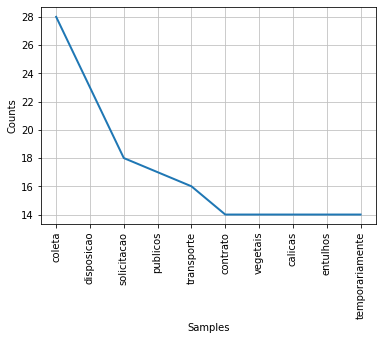

############## AGUA VERDE ##############


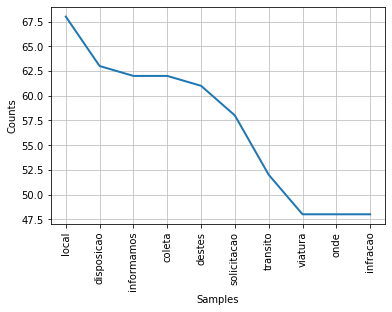

############## AHU ##############


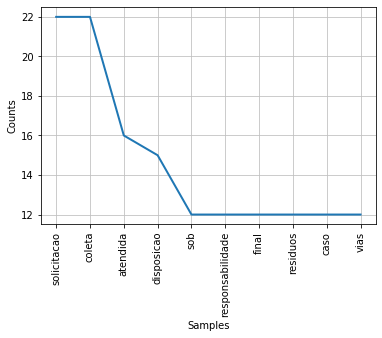

############## ALTO BOQUEIRAO ##############


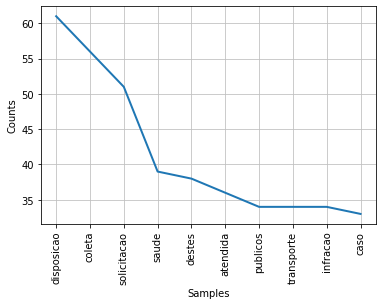

############## ALTO DA GLORIA ##############


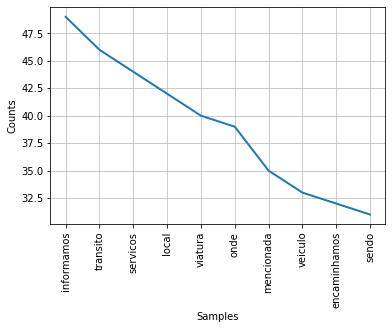

############## ALTO DA RUA XV ##############


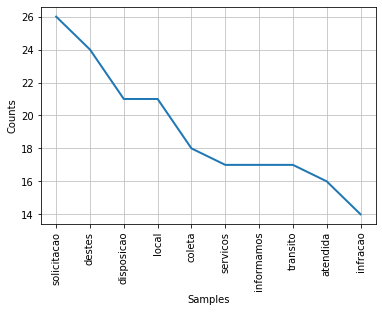

############## ATUBA ##############


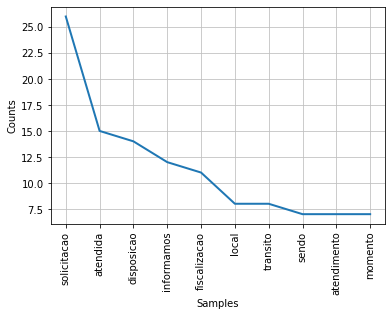

############## AUGUSTA ##############


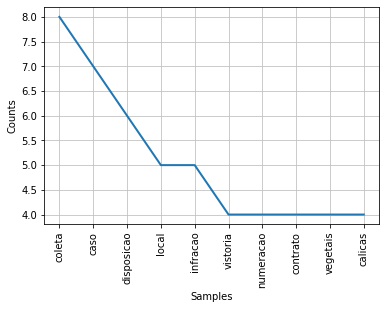

############## BACACHERI ##############


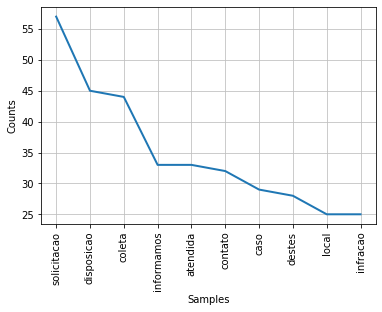

############## BAIRRO ALTO ##############


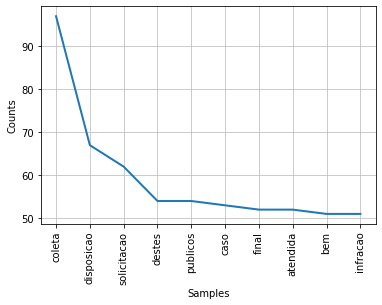

############## BARREIRINHA ##############


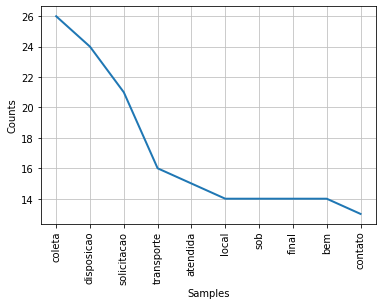

############## BATEL ##############


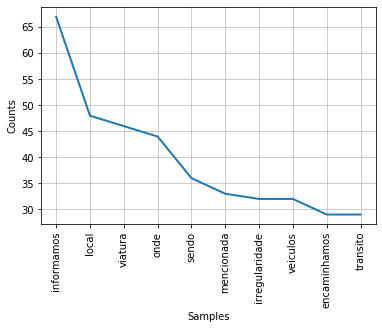

############## BIGORRILHO ##############


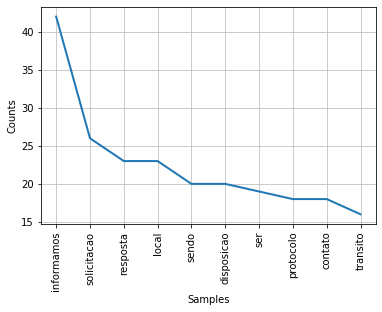

############## BOA VISTA ##############


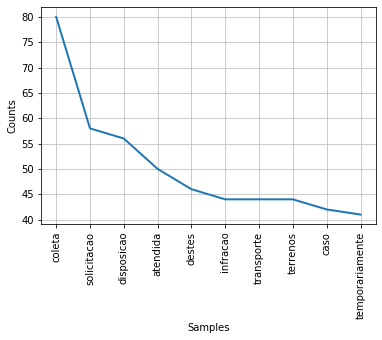

############## BOM RETIRO ##############


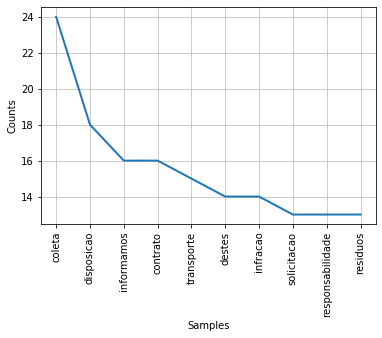

############## BOQUEIRAO ##############


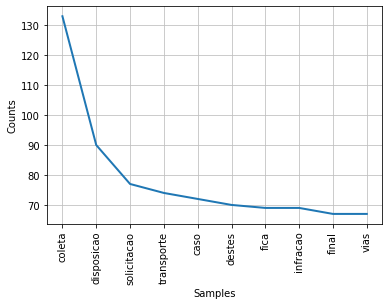

############## BUTIATUVINHA ##############


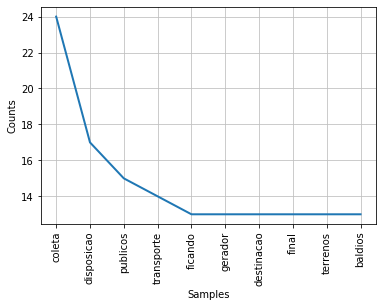

############## CABRAL ##############


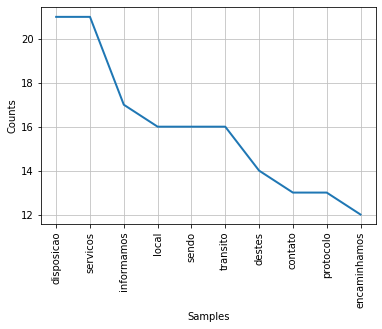

############## CACHOEIRA ##############


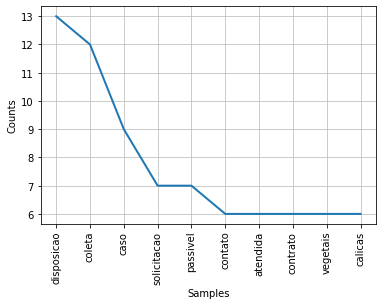

############## CAJURU ##############


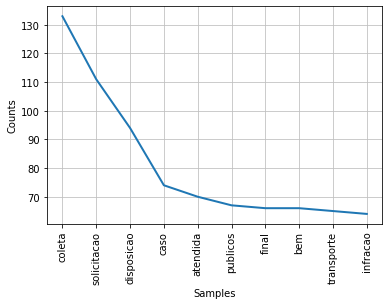

############## CAMPINA DO SIQUEIRA ##############


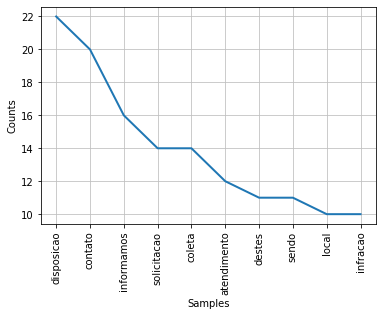

############## CAMPO COMPRIDO ##############


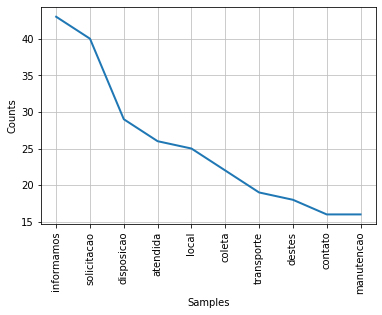

############## CAMPO DE SANTANA ##############


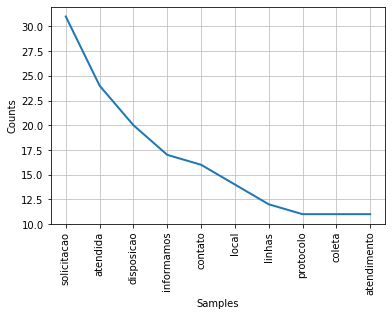

############## CAPAO DA IMBUIA ##############


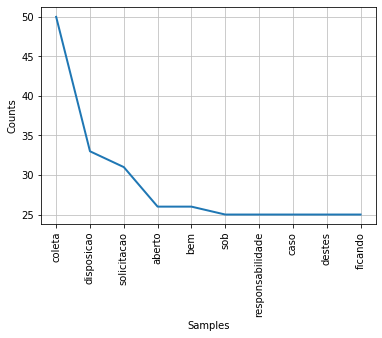

############## CAPAO RASO ##############


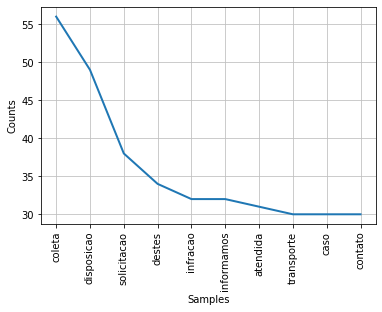

############## CASCATINHA ##############


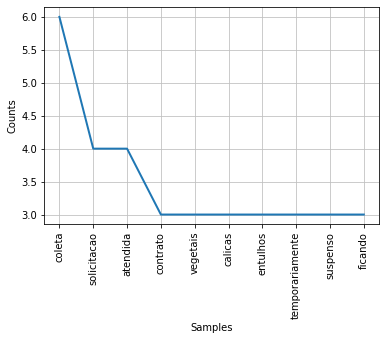

############## CAXIMBA ##############


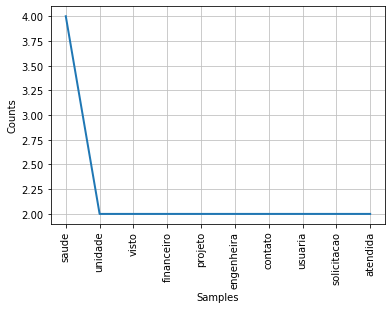

############## CENTRO ##############


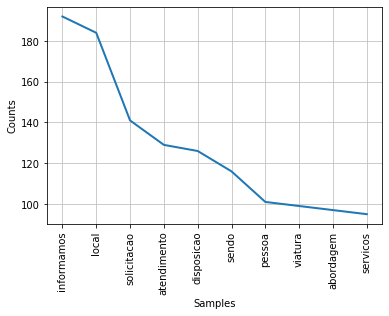

############## CENTRO CIVICO ##############


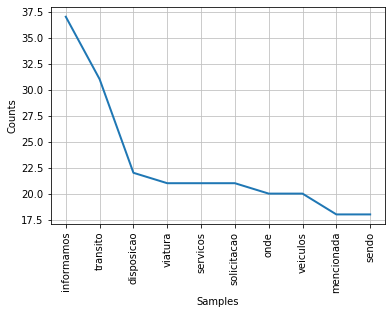

############## CIDADE INDUSTRIAL ##############


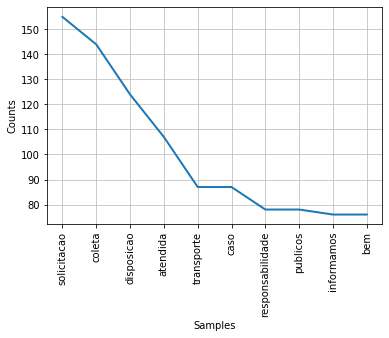

############## CRISTO REI ##############


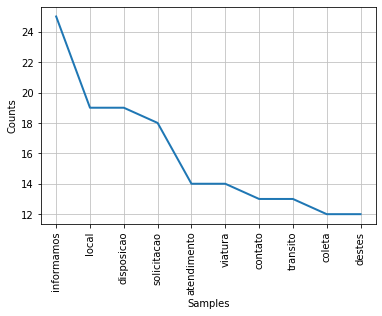

############## FANNY ##############


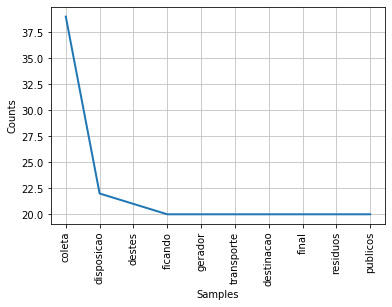

############## FAZENDINHA ##############


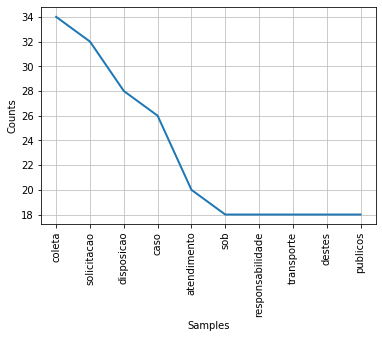

############## GANCHINHO ##############


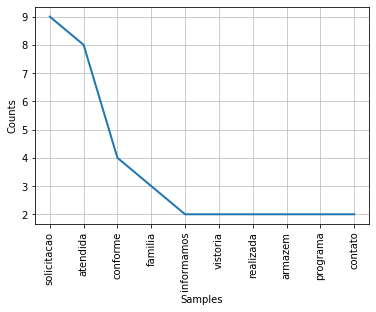

############## GUABIROTUBA ##############


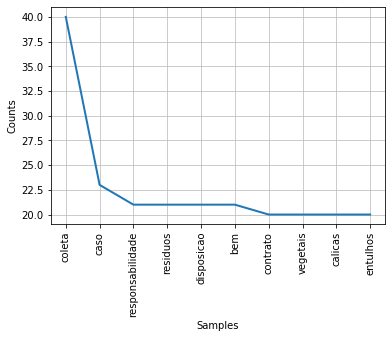

############## GUAIRA ##############


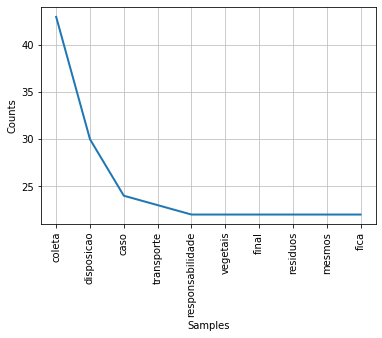

############## HAUER ##############


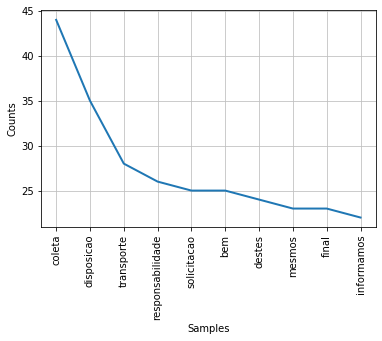

############## HUGO LANGE ##############


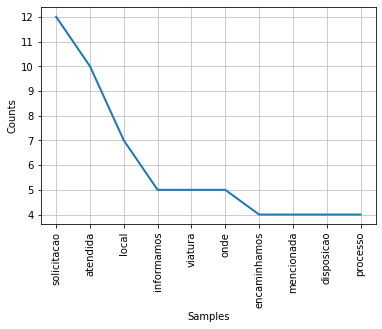

############## JARDIM BOTANICO ##############


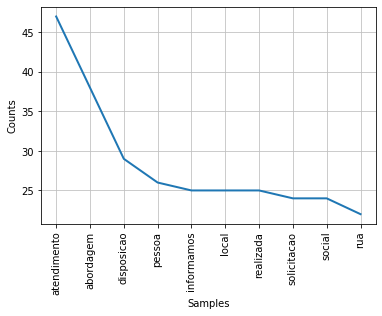

############## JARDIM DAS AMERICAS ##############


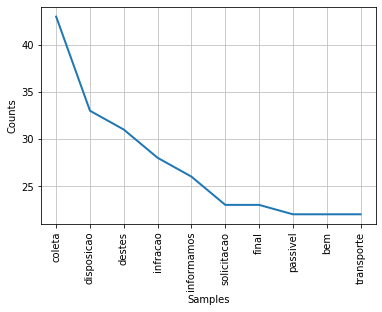

############## JARDIM SOCIAL ##############


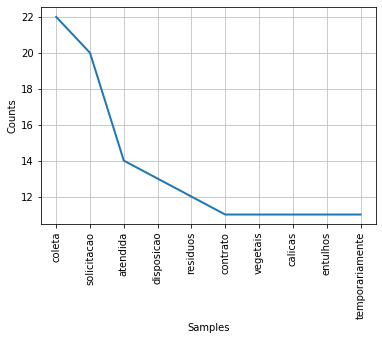

############## JUVEVE ##############


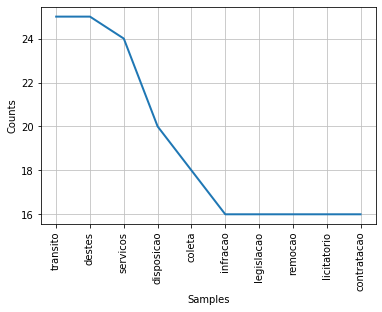

############## LAMENHA PEQUENA ##############


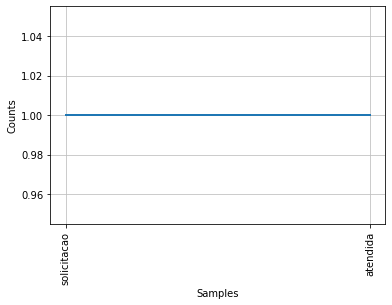

############## LINDOIA ##############


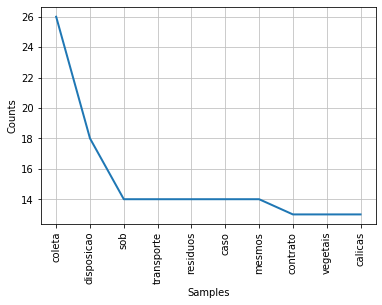

############## MERCES ##############


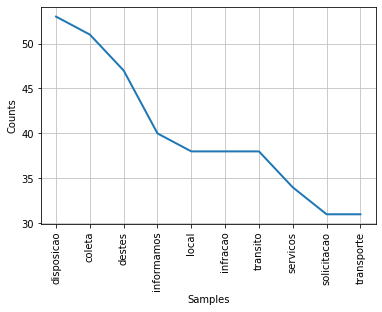

############## MOSSUNGUE ##############


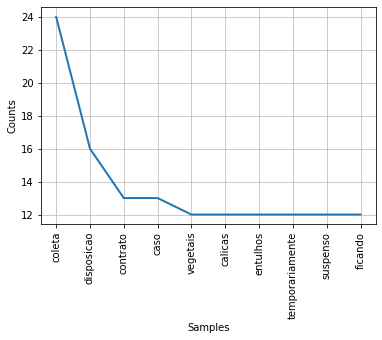

############## NOVO MUNDO ##############


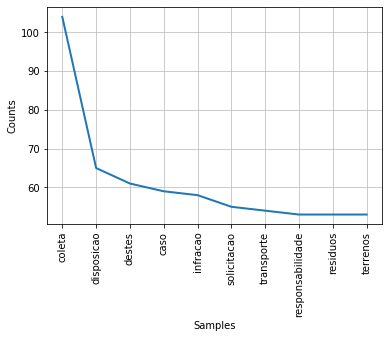

############## ORLEANS ##############


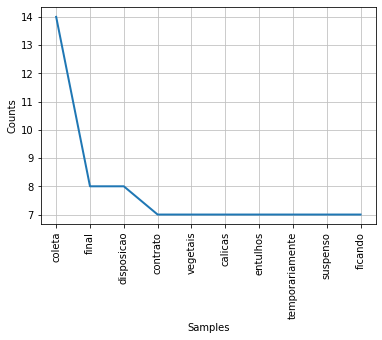

############## PAROLIN ##############


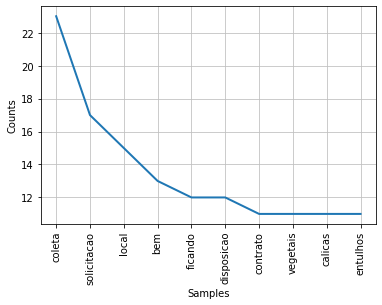

############## PILARZINHO ##############


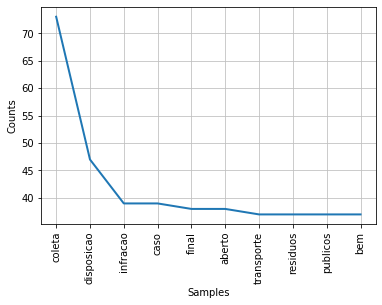

############## PINHEIRINHO ##############


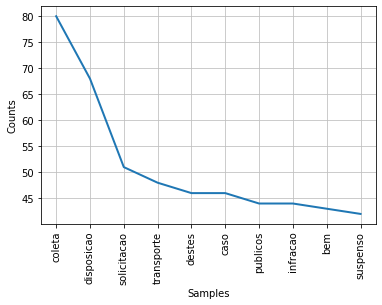

############## PORTAO ##############


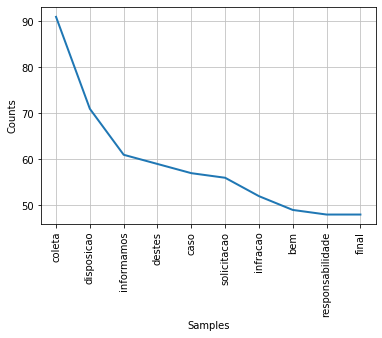

############## PRADO VELHO ##############


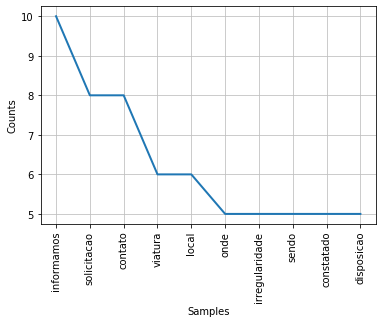

############## REBOUCAS ##############


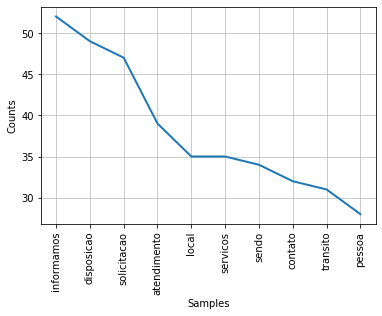

############## RIVIERA ##############


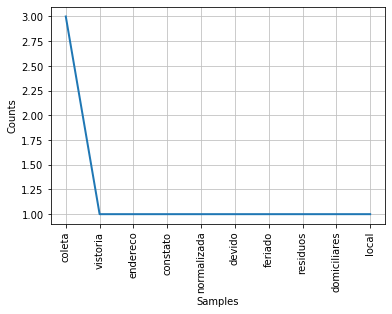

############## SANTA CANDIDA ##############


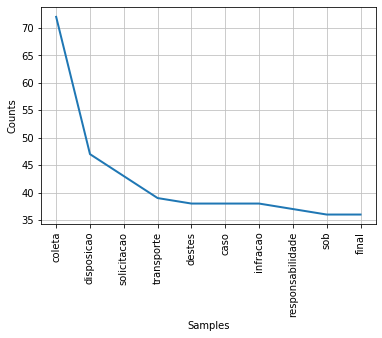

############## SANTA FELICIDADE ##############


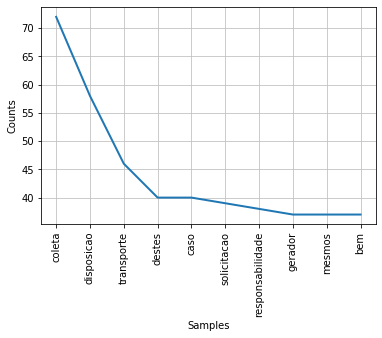

############## SANTA QUITERIA ##############


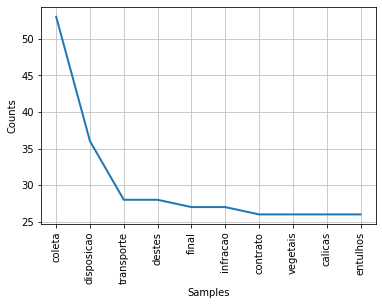

############## SANTO INACIO ##############


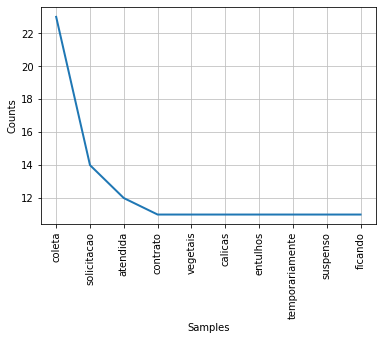

############## SAO BRAZ ##############


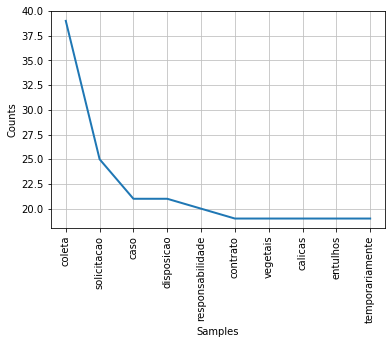

############## SAO FRANCISCO ##############


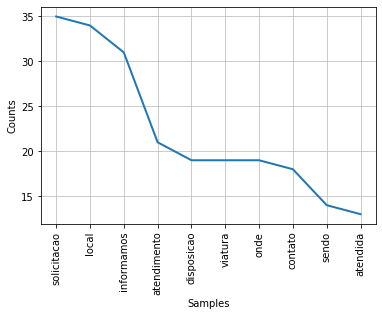

############## SAO JOAO ##############


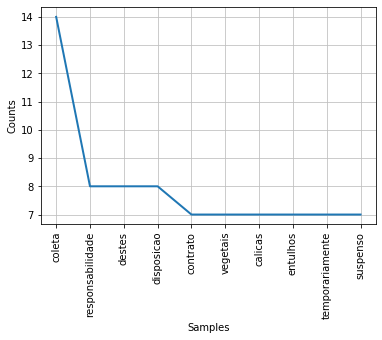

############## SAO LOURENCO ##############


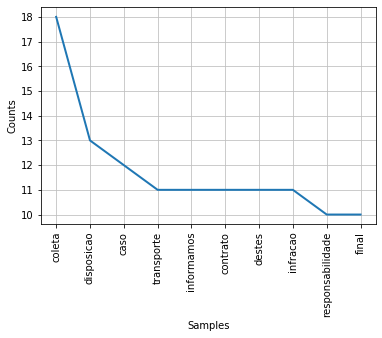

############## SAO MIGUEL ##############


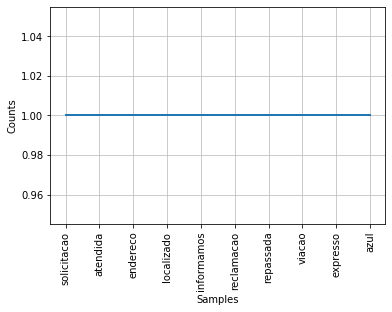

############## SEMINARIO ##############


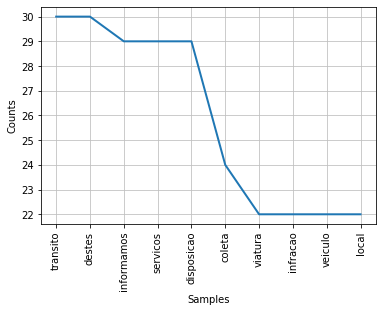

############## SITIO CERCADO ##############


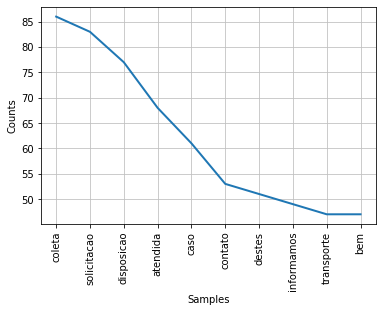

############## TABOAO ##############


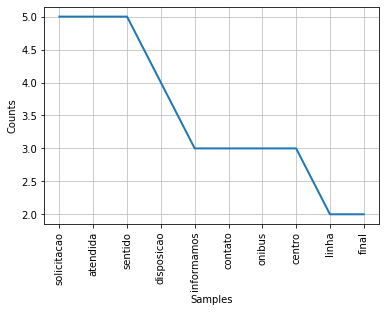

############## TARUMA ##############


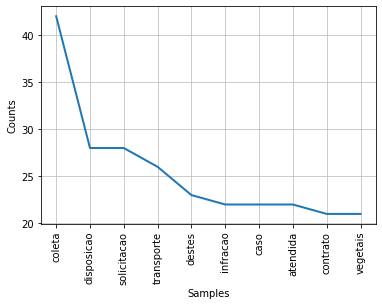

############## TATUQUARA ##############


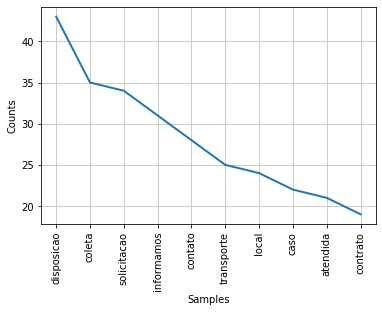

############## TINGUI ##############


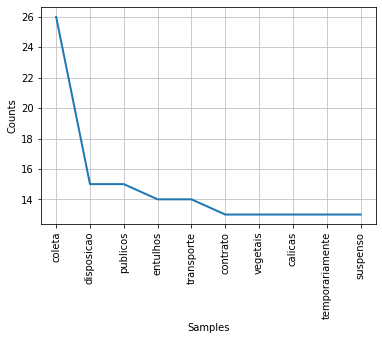

############## UBERABA ##############


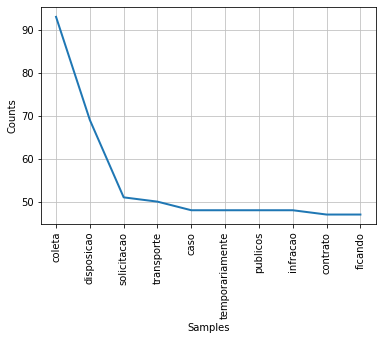

############## UMBARA ##############


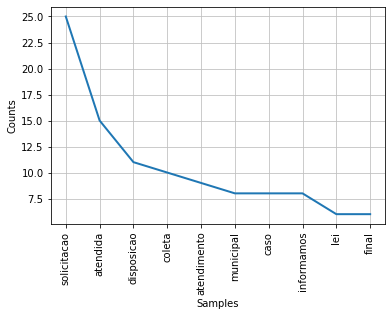

############## VILA IZABEL ##############


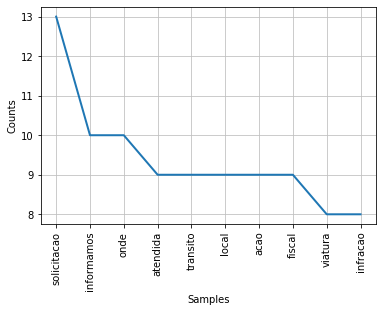

############## VISTA ALEGRE ##############


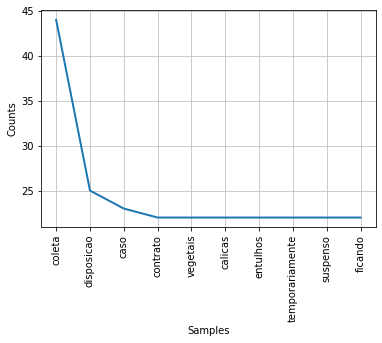

############## XAXIM ##############


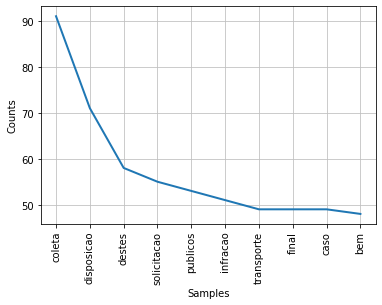

In [7]:
from nltk.probability import FreqDist

for bairro, texto in df_bairros.items():
    print("############## {} ##############".format(bairro))
    freqDist = FreqDist(texto.split(" "))
    freqDist.plot(10)

Outra forma interessante de visualizar palavras importantes em um texto é o gráfico de nuvem de palavras (word cloud). Abaixo importamos a biblioteca wordcloud e criamos uma nuvem para cada bairro:

############## ABRANCHES ##############


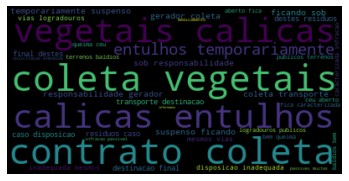

############## AGUA VERDE ##############


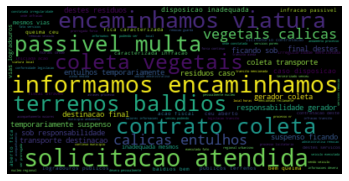

############## AHU ##############


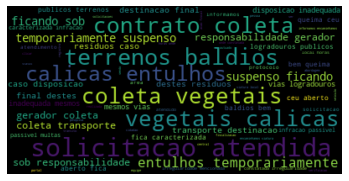

############## ALTO BOQUEIRAO ##############


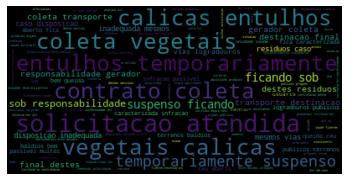

############## ALTO DA GLORIA ##############


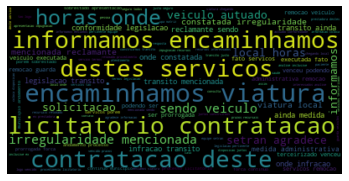

############## ALTO DA RUA XV ##############


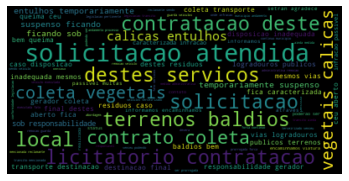

############## ATUBA ##############


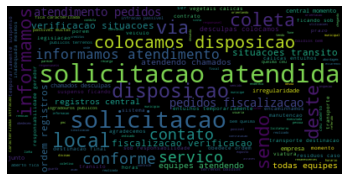

############## AUGUSTA ##############


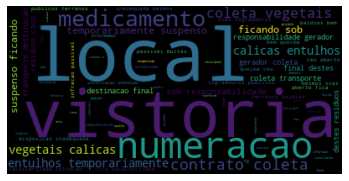

############## BACACHERI ##############


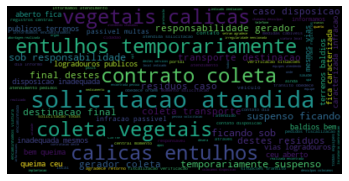

############## BAIRRO ALTO ##############


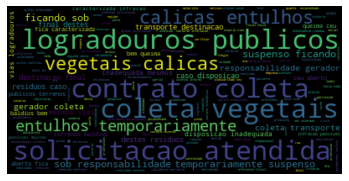

############## BARREIRINHA ##############


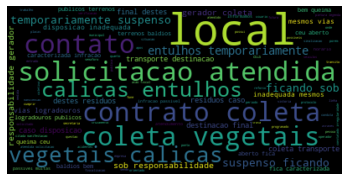

############## BATEL ##############


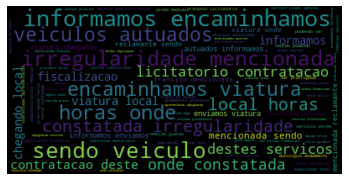

############## BIGORRILHO ##############


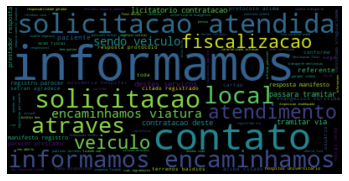

############## BOA VISTA ##############


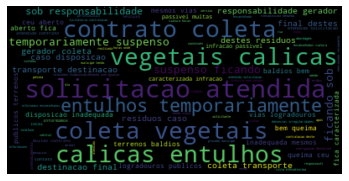

############## BOM RETIRO ##############


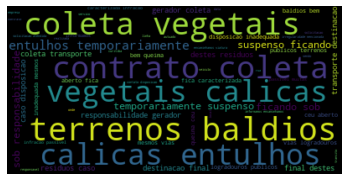

############## BOQUEIRAO ##############


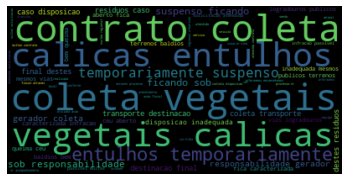

############## BUTIATUVINHA ##############


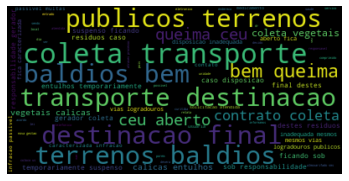

############## CABRAL ##############


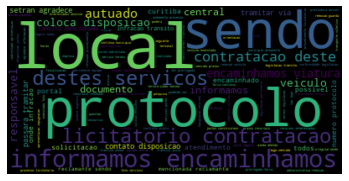

############## CACHOEIRA ##############


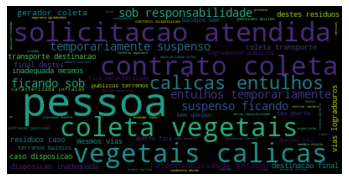

############## CAJURU ##############


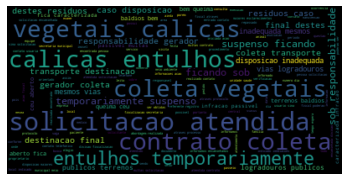

############## CAMPINA DO SIQUEIRA ##############


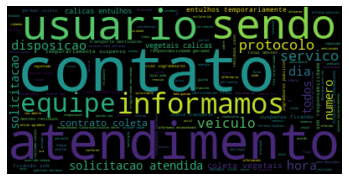

############## CAMPO COMPRIDO ##############


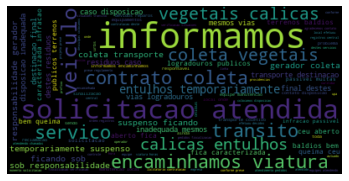

############## CAMPO DE SANTANA ##############


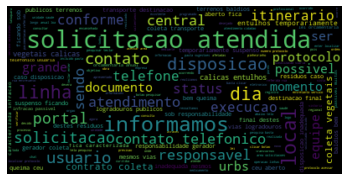

############## CAPAO DA IMBUIA ##############


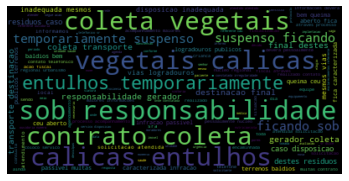

############## CAPAO RASO ##############


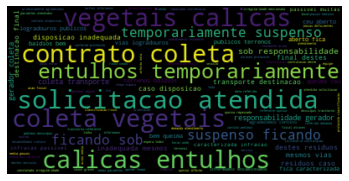

############## CASCATINHA ##############


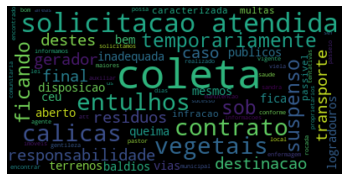

############## CAXIMBA ##############


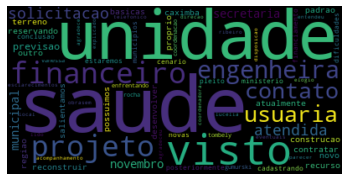

############## CENTRO ##############


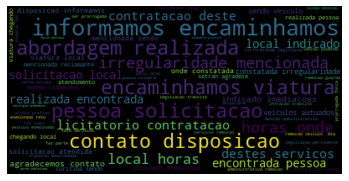

############## CENTRO CIVICO ##############


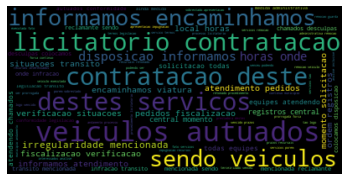

############## CIDADE INDUSTRIAL ##############


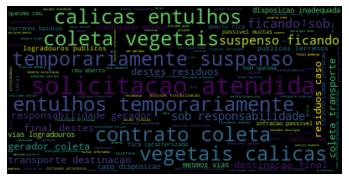

############## CRISTO REI ##############


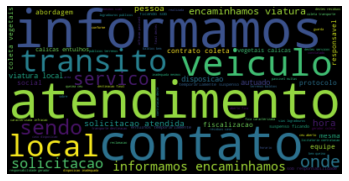

############## FANNY ##############


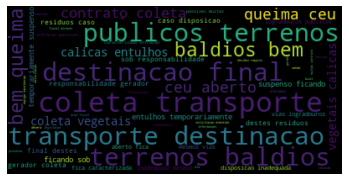

############## FAZENDINHA ##############


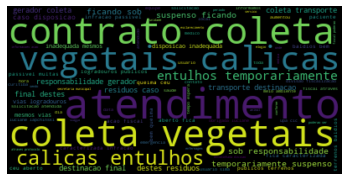

############## GANCHINHO ##############


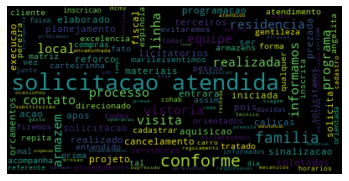

############## GUABIROTUBA ##############


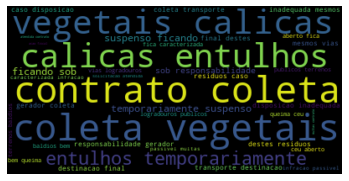

############## GUAIRA ##############


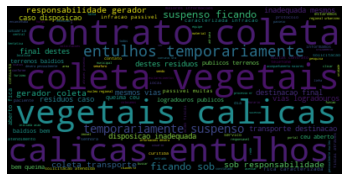

############## HAUER ##############


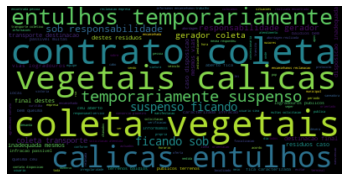

############## HUGO LANGE ##############


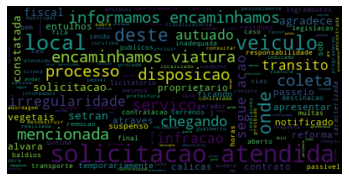

############## JARDIM BOTANICO ##############


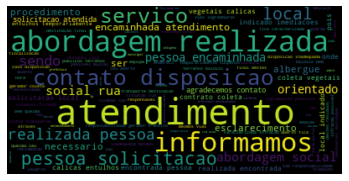

############## JARDIM DAS AMERICAS ##############


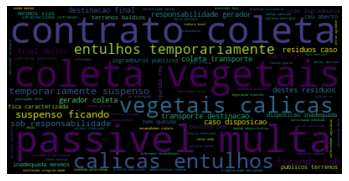

############## JARDIM SOCIAL ##############


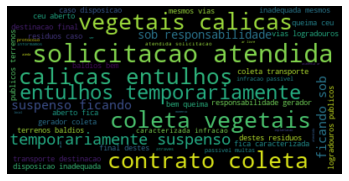

############## JUVEVE ##############


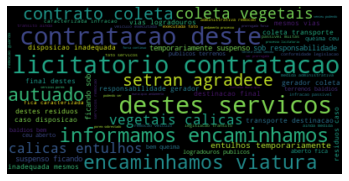

############## LAMENHA PEQUENA ##############


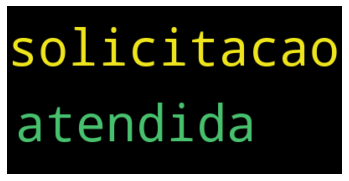

############## LINDOIA ##############


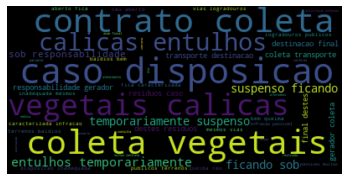

############## MERCES ##############


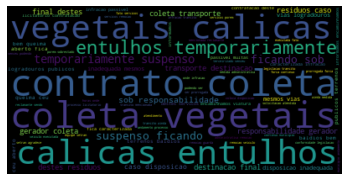

############## MOSSUNGUE ##############


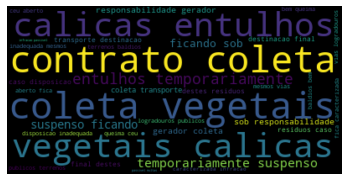

############## NOVO MUNDO ##############


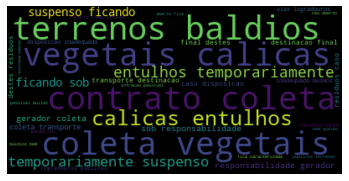

############## ORLEANS ##############


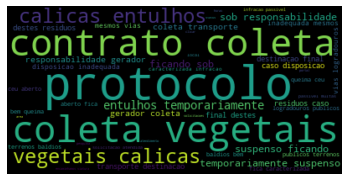

############## PAROLIN ##############


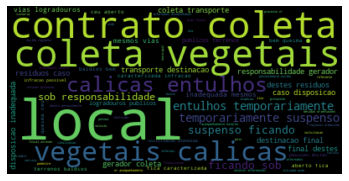

############## PILARZINHO ##############


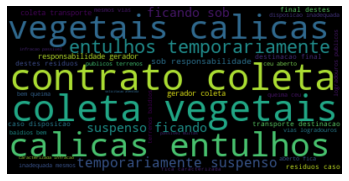

############## PINHEIRINHO ##############


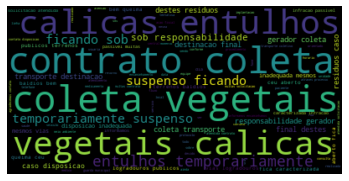

############## PORTAO ##############


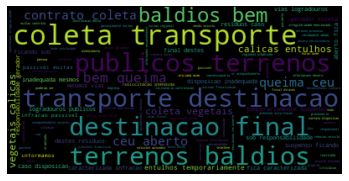

############## PRADO VELHO ##############


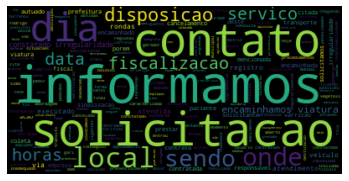

############## REBOUCAS ##############


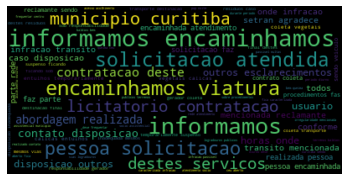

############## RIVIERA ##############


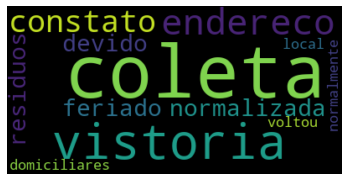

############## SANTA CANDIDA ##############


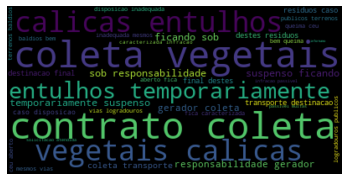

############## SANTA FELICIDADE ##############


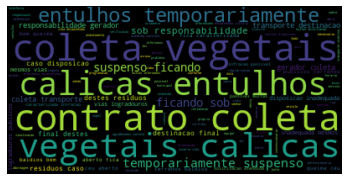

############## SANTA QUITERIA ##############


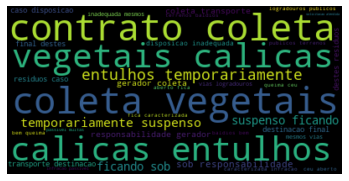

############## SANTO INACIO ##############


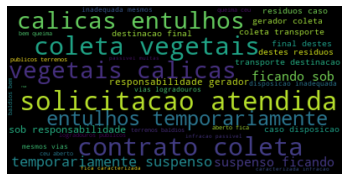

############## SAO BRAZ ##############


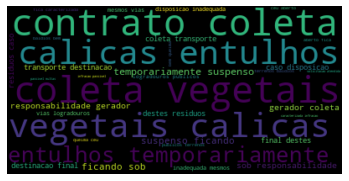

############## SAO FRANCISCO ##############


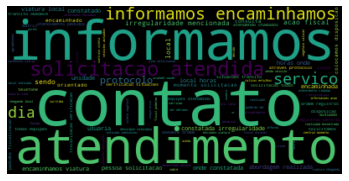

############## SAO JOAO ##############


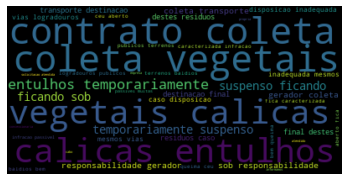

############## SAO LOURENCO ##############


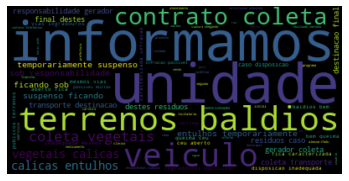

############## SAO MIGUEL ##############


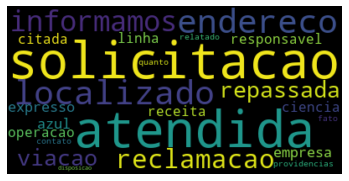

############## SEMINARIO ##############


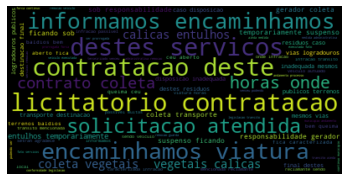

############## SITIO CERCADO ##############


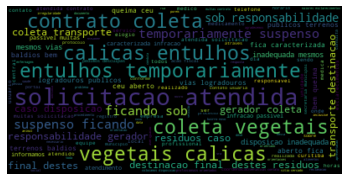

############## TABOAO ##############


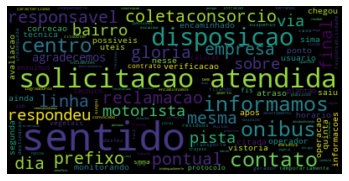

############## TARUMA ##############


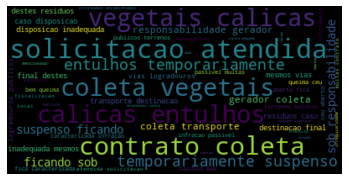

############## TATUQUARA ##############


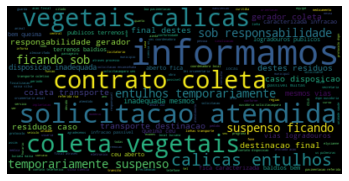

############## TINGUI ##############


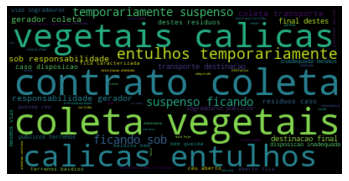

############## UBERABA ##############


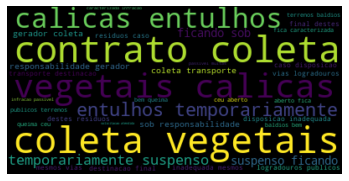

############## UMBARA ##############


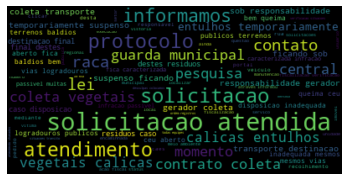

############## VILA IZABEL ##############


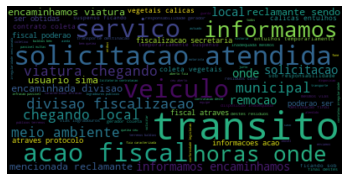

############## VISTA ALEGRE ##############


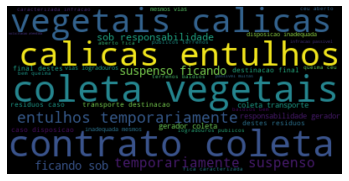

############## XAXIM ##############


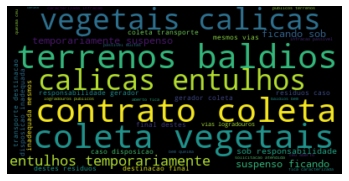

In [8]:
from wordcloud import WordCloud

for bairro, texto in df_bairros.items():
    print("############## {} ##############".format(bairro))
    # Cria a imagem da nuvem de palavras:
    wordcloud = WordCloud().generate(texto)

    # Exibe a imagem gerada
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()